# 퍼셉트론 알고리즘

 - 퍼셉트론은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘이다.
 - 나온지 꽤 오래된 이 알고리즘이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이다.

# 퍼셉트론이란?
 - 퍼셉트론은 다수의 신호를 입력받아 하나의 신호를 출력한다. 여기서 말하는 신호란 전류나 강물처럼 흐름이 있는 것이다. 전류가 전선을 타고 흐르는 전자를 내보내듯, 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달한다.
 - 다만, 실제 전류와는 달리 퍼셉트론 신호는 "흐른다/안흐른다(1 or 0)"의 두 가지 값만 가질 수 있다.

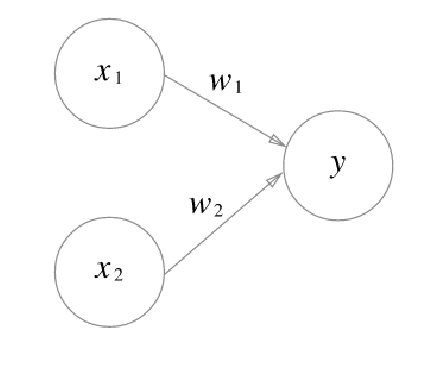

In [1]:
# 입력이 2개인 퍼셉트론
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread("./Image/Perceptron1.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위의 그림은 입력으로 2개의 신호를 받은 퍼셉트론의 예이다. $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치를 뜻한다.
 - 그림의 원을 뉴런 혹은 노드라고 부른다.
 - 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.($w_1x_1$,$w_2x_2$)
 - 뉴련에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1 을 출력한다.(이를 "뉴련이 활성화한다"라고도 부른다.)
 - 보통 그 한계를 임계값이라 하며, 기호로는 $\theta$(theta)로 나타낸다

# 퍼셉트론 동작 원리를 수식으로 표현

$y =
\begin{cases}
0, & \mbox{$w_1x_1$ + $w_2x_2$ $\le$ $\theta$ } \\
1, & \mbox{$w_1x_1$ + $w_2x_2$ $\gt$ $\theta$ }
\end{cases}$

# AND 게이트
 - 퍼셉트론을 활용해 간단한 문제를 해결할 수 있다.
 - AND 게이트를 살펴보자
 - AND 게이트는 입력이 둘이고, 출력은 하나이다.

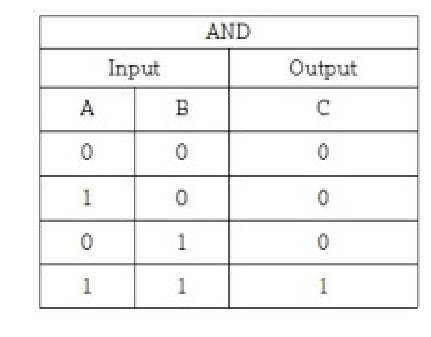

In [2]:
# AND 게이트의 진리표
img = imread("./Image/AND_GATE.jpg") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 이 AND 게이트를 퍼셉트론으로 표현하고 싶다. 이를 위해 할일을 진리표대로 작동하도록, $w_1$, $w_2$, $\theta$의 값을 정하는 것이다.
 - 그렇다면 어떤 값으로 설정하면 조건을 충족하는 퍼셉트론이 만들어질까?
 - 진리표를 만족시키는 매개변수의 조합은 무수히 많다. ($w_1$, $w_2$, $\theta$)가 $(0.5,0.5,0.7)$, $(0.5,0.5,0.8)$, $(1.0,1.0,1.0)$ 등등 모두 만족한다.
 - 매개변수를 이렇게 설정하면 $x_1$과 $x_2$가 모두 1일 때만 가중 신호의 총합이 주어진 임계값을 넘어서게 된다.

# NAND 게이트와 OR 게이트
 - NAND 게이트는 NOT AND 게이트를 의미하며, 그 동작은 AND 게이트를 뒤집은 것이다.

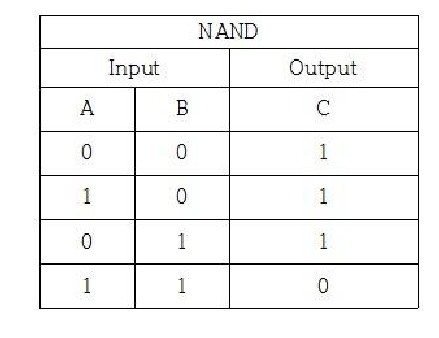

In [3]:
# NAND 게이트의 진리표
img = imread("./Image/NAND_GATE.jpg") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - NAND 게이트를 표현하려면, 예를 들어 ($w_1$, $w_2$, $\theta$)가 $(-0.5,-0.5,-0.7)$의 조합이 있다.
 - AND 게이트의 매개변수 부호를 모두 반전하면, NAND 게이트가 된다.

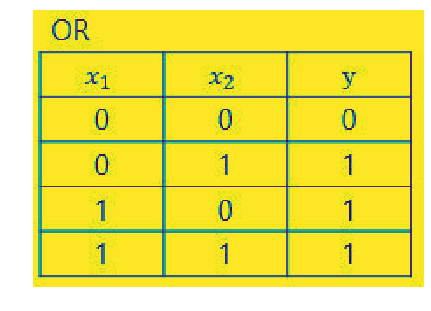

In [4]:
# OR 게이트의 진리표
img = imread("./Image/OR_GATE.jpg") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 매개변수만 적당히 잘 조절하면, OR 게이트 역시 무한개로 만들 수 있다.

# 퍼셉트론 구현하기

In [5]:
def AND_GATE (x1, x2) : 
    w1, w2, theta = 0.5, 0.5, 0.7
    value = w1*x1 + w2*x2
    if value <= theta : 
        return 0
    else : 
        return 1

In [6]:
AND_GATE(0,0)

0

In [7]:
AND_GATE(1,0)

0

In [8]:
AND_GATE(0,1)

0

In [9]:
AND_GATE(1,1)

1

# 가중치와 편향 도입
 - 앞서 구현한 AND 게이트는 직관적이고 알기 쉽지만, 앞으로를 생각해서 다른 방식으로 정의한다.
 - 퍼셉트론의 수식에서 $\theta$를 $-b$로 치환하면 다음과 같다.

$y =
\begin{cases}
0, & \mbox{$b + w_1x_1$ + $w_2x_2$ $\le$ 0 } \\
1, & \mbox{$b + w_1x_1$ + $w_2x_2$ $\gt$ 0}
\end{cases}$

 - 맨 처음식과 기호 표기만 바꼇을 뿐, 그 의미는 동일하다. 여기서 $b$를 편향(Bias)라고 새롭게 정의한다.

In [10]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -0.7

In [11]:
w*x

array([0. , 0.5])

In [12]:
np.sum(w*x)

0.5

In [13]:
np.sum(w*x) + b

-0.19999999999999996

# 가중치와 편향 구현하기

In [14]:
def AND_GATE (x1, x2) : 
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    value = np.sum(w*x) + b 
    if value > 0 : 
        return 1
    else : 
        return 0

In [15]:
print(AND_GATE(0,0), end=" ") ; print(AND_GATE(0,1), end=" ") ; print(AND_GATE(1,0), end=" ") ; print(AND_GATE(1,1), end=" ")

0 0 0 1 

In [16]:
def NAND_GATE (x1, x2) : 
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    value = np.sum(w*x) + b 
    if value > 0 : 
        return 1
    else : 
        return 0

In [17]:
print(NAND_GATE(0,0), end=" ") ; print(NAND_GATE(0,1), end=" ") ; print(NAND_GATE(1,0), end=" ") ; print(NAND_GATE(1,1), end=" ")

1 1 1 0 

In [18]:
def OR_GATE (x1, x2) : 
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    value = np.sum(w*x) + b 
    if value > 0 : 
        return 1
    else : 
        return 0

In [19]:
print(OR_GATE(0,0), end=" ") ; print(OR_GATE(0,1), end=" ") ; print(OR_GATE(1,0), end=" ") ; print(OR_GATE(1,1), end=" ")

0 1 1 1 

# 퍼셉트론의 한계 : XOR 게이트
 - XOR 게이트는 배타적 논리합이라는 논리 회로이다.
 - $x_1$과 $x_2$ 둘 중 한쪽이 1일 때만 1을 출력한다.

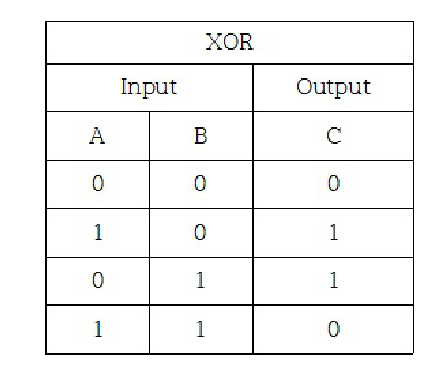

In [20]:
# XOR 게이트의 진리표
img = imread("./Image/XOR_GATE.jpg") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위와 같은 진리표를 구현하기 위해서는 가중치 매개변수를 어떻게 설정해야할까?
 - 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.

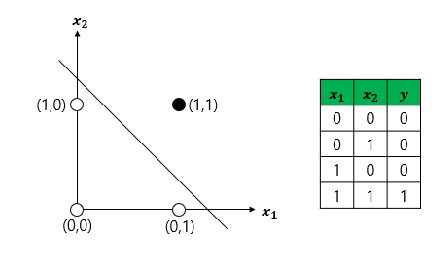

In [21]:
# AND 게이트의 시각화
img = imread("./Image/AND_Graph.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

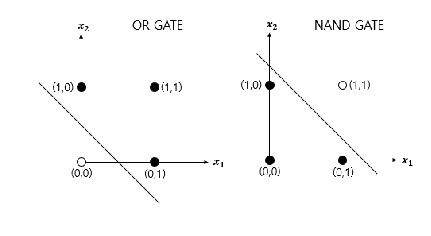

In [22]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/OR_Graph.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위의 그래프처럼 AND와 OR, NAND는 직선으로 표현이 가능하다.
 - 하지만, 위와 같은 방법으로 XOR 그래프를 표현하면 다음과 같다.

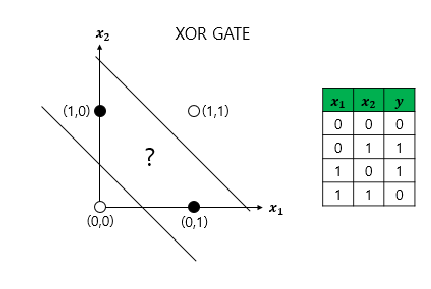

In [23]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/XOR_Graph.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

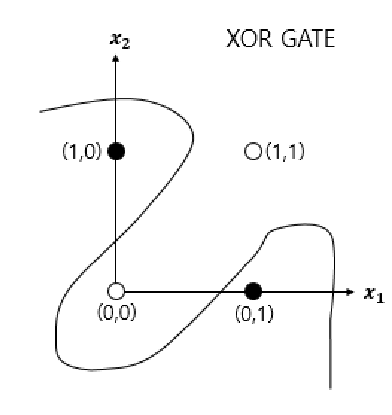

In [24]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/XOR_Graph_2.png") ; plt.figure(figsize=(7,7)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 위의 그림처럼 정확하게 XOR 그래프를 구현하기 위해서는 직선으로 불가능하다.
 - 다시말해, 단층 퍼셉트론 하나로는 XOR 게잍르를 구현하기에는 한게가 있다는 거이다.

# 다층 퍼셉트론
 - 하나의 퍼셉트론으로 불가능하다면, 여러 개의 퍼셉트론을 쌓아서 다층 퍼셉트론을 구축하는 방법을 고려해 볼 수 있다.

# 기존 게이트 조합하기
 - XOR 게이트를 만드는 방법은 다양하다. 그중 하나는 앞서 만든, AND, OR, NAND 게이트를 조합하는 방법이다.
 - 아래의 기호들은 전 세계에서 사용하는 게이트들의 약식 기호이다.

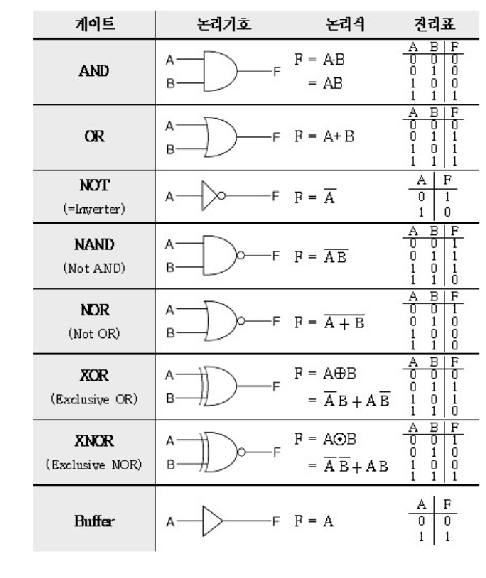

In [25]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/gate_sign.png") ; plt.figure(figsize=(20, 10)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - AND, or, NAND 게이트를 각각 하나씩 사용하여 XOR 게이트를 다음과 같이 만들 수 있다.

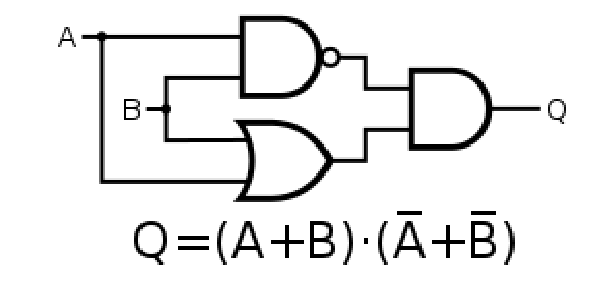

In [26]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/XOR_Gate.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

In [27]:
# 위에서 구현한 XOR 게이트의 진리표
XOR_GATE = np.array([["A","B","X","Y","Z"],
                     [0,0,1,0,0],
                     [1,0,1,1,1],
                     [0,1,1,1,1],
                     [1,1,0,1,0]])
XOR_GATE

array([['A', 'B', 'X', 'Y', 'Z'],
       ['0', '0', '1', '0', '0'],
       ['1', '0', '1', '1', '1'],
       ['0', '1', '1', '1', '1'],
       ['1', '1', '0', '1', '0']], dtype='<U1')

# XOR 게이트 구현하기

In [28]:
def XOR_GATE (x1, x2) : 
    x = NAND_GATE(x1,x2)
    y = OR_GATE(x1,x2)
    z = AND_GATE(x,y)
    return z

print(XOR_GATE(0,0), end=" ") ; print(XOR_GATE(0,1), end=" ") ; print(XOR_GATE(1,0), end=" ") ; print(XOR_GATE(1,1), end=" ")

0 1 1 0 

 - XOR 게이트를 퍼셉트론으로 시각화하면 다음과 같다.

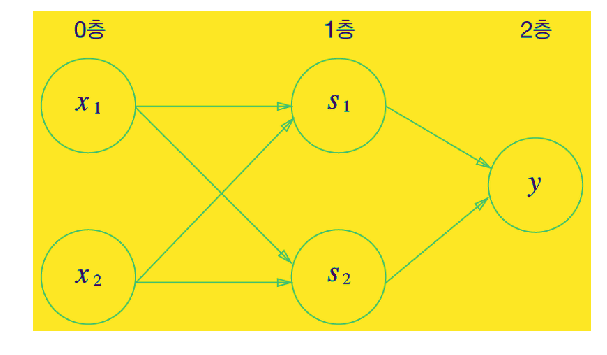

In [29]:
# OR 게이트와 NAND 게이트의 시각화
img = imread("./Image/XOR_Perceptron.png") ; plt.figure(figsize=(10, 10)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

 - 그런데, 이 XOR 퍼셉트론은 AND, OR, NAND 와는 다른 형태를 띄고 있다.
 - 바로, 이 XOR 퍼셉트론이 2층 퍼셉트론이다.
 - 이처럼, 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라고 한다.
 - 물론, 위의 그림을 보면, 3개의 층으로 구성되어 있지만, 가중치를 갖는 층은 1층과 2층 2개이므로 일반적으로는 "2층 퍼셉트론"이라고 부른다.
 - 간혹 문헌에 따라 "3층 퍼셉트론"이라고 부르기도 한다.

# NAND에서 컴퓨터까지
 - 다층 퍼셉트론을 잘 활용하면 지금까지 본 회로보다 더 복잡한 회로를 만들 수도 있다.
 - 예를 들면, 덧셈을 처리하는 가산기, 2진수를 10진수로 변환하는 인코더, 어떤 조건을 충족하면 1을 출력하는 회로(패리티 검사 회로) 등이 있다.
 - 더 나아가서, 컴퓨러르 NAND 게이트만으로 구현할 수도 있다.
 - 이론상으로는 2층 퍼세ㅂ트론, 정확히는 비선형인 시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다.
 - 그러나 2층 퍼셉트론 구조에서 가중치를 적절히 설정하여 컴퓨터를 만드는 것은 매우 어렵다.